# Table of Contents

1. [Dataset Module](#dataset-module)
2. [DetDataset Class](#detdataset-class)
    - [Statistics and analysis](#statistics-and-analysis)
    - [Visualizer](#visualizer)
3. [Passing csv files as root](#passing-csv-files-as-root)
    - [YOLO Detection](#yolo-detection)
    - [COCO Detection](#coco-detection)
4. [SegDataset Class](#segdataset-class)
    - [Statistics and analysis](#statistics-and-analysis-1)
    - [Visualizer](#visualizer-1)
    - [Passing csv files as root](#passing-csv-files-as-root-1)
    - [COCO Segmentation](#coco-segmentation)
    - [YOLO Segmentation](#yolo-segmentation)

## Dataset Module

The `cv_utility.dataset` module provides a unified interface for working with computer vision datasets. It supports multiple dataset formats and provides utilities for visualization, analysis and format conversion.

**Key Features**

- **Multiple Format Support**: Handles common dataset formats like COCO, YOLO, Base , Mask , Detectron2 format.
- **Dataset Analysis**: Tools to analyze dataset statistics and distributions
- **Visualization**: Built-in visualization capabilities for images, bounding boxes and ma`sks
- **Format Conversion**: Easy conversion between different dataset formats
- **Data Export**: Export datasets to various formats with options to copy images


## DetDataset Class

The `DetDataset` class is a core component of cv_utility.dataset that handles object detection datasets. It provides a unified interface for working with detection annotations across different formats.

**Key Capabilities**:

- **Format Support**: 
  - COCO format
  - YOLO format 
  - Base format

- **Dataset Operations**:
  - Load and parse annotations
  - Access image and annotation data
  - Split datasets into train/val/test
  - Filter and modify annotations

- **Analysis Tools**:
  - Bounding box statistics
  - Class distributions
  - Dataset splits analysis
  - Image size distributions

- **Visualization**:
  - Render bounding boxes on images
  - Plot class distributions
  - Show batch samples
  - Create dataset preview videos

- **Export Options**:
  - Convert between supported formats
  - Export with or without copying images
  - Maintain dataset splits during export


In [1]:
from core_assist.dataset import DetDataset
dataset = DetDataset("../dataset/det_coco", format="coco")   

Processing directory splits: 100%|██████████| 1/1 [00:00<00:00, 34.28it/s]


In [2]:
dataset.label_df.head()

,image_id,image_width,image_height,x_min,y_min,width,height,category,class_id,split,image_path
0,Auction_A1_20221106_130911.png,1024,1024,60.0,60.0,80.0,80.0,cat,1,train,../dataset/det_coco/images/train/Auction_A1_20...
1,Auction_A1_20221106_130911.png,1024,1024,210.0,120.0,80.0,0.0,cat,1,train,../dataset/det_coco/images/train/Auction_A1_20...
2,Auction_A1_20221106_130911.png,1024,1024,300.0,300.0,150.0,150.0,bird,2,train,../dataset/det_coco/images/train/Auction_A1_20...
3,Auction_A1_20221106_130911.png,1024,1024,360.0,300.0,90.0,150.0,dog,0,train,../dataset/det_coco/images/train/Auction_A1_20...
4,Auction_A1_20221106_130911.png,1024,1024,370.0,300.0,80.0,150.0,bird,2,train,../dataset/det_coco/images/train/Auction_A1_20...


### Statistics and analysis

The `DetDataset` class provides a `show_distribution` method that displays class distributions and image size distributions for the dataset.

The `bbox_stats` and `bbox_scatter` methods provide statistics and scatter plots for bounding boxes in the dataset.

The `label_df` attribute provides a DataFrame containing the annotations for the dataset.

The `describe` attribute provides summary statistics for the dataset.

In [3]:
dataset.show_distribution()

alt.Chart(...)

In [4]:
dataset.bbox_stats()

,x_min,y_min,width,height
count,20.000000,20.000000,20.000000,20.000000
mean,260.000000,216.000000,96.000000,106.000000
std,118.054405,107.331261,27.984959,61.078033
min,60.000000,60.000000,80.000000,0.000000
25%,210.000000,120.000000,80.000000,80.000000
50%,300.000000,300.000000,80.000000,150.000000
75%,360.000000,300.000000,90.000000,150.000000
max,370.000000,300.000000,150.000000,150.000000


In [5]:
dataset.bbox_scatter()

alt.Chart(...)

In [6]:
dataset.describe

,split,images,annotations,categories
0,train,4,20,3


### Visualizer

The `DetDataset` class provides a `visualizer` attribute that allows you to visualize bounding boxes on images.

**Key Methods**:

- **show_image**: Display a single image with bounding boxes.
- **show_batch**: Display a batch of images with bounding boxes.
- **show_video**: Create a video preview of the dataset with bounding boxes.



In [7]:
visualizer = dataset.visualizer(split="train")

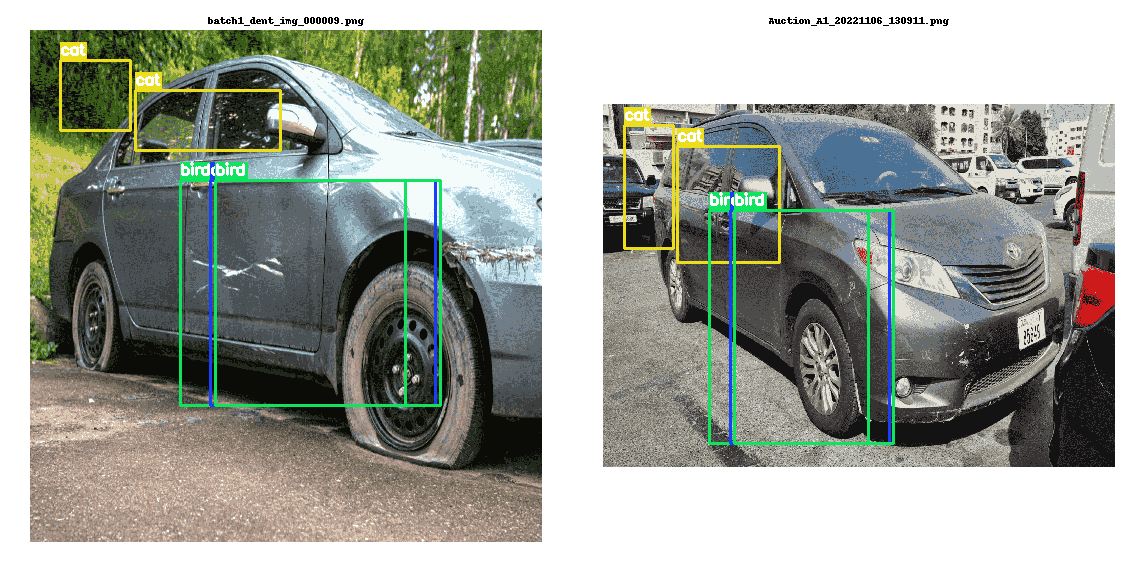

In [8]:
visualizer.show_batch(samples=2,render="pil")

In [9]:
visualizer.show_video(samples = 2)

In [10]:
# dataset.export(to="base" , output_dir="/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/Dataset" ,copy_images=True)
# dataset.export(to="yolo" , output_dir="/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/Dataset" ,copy_images=True)
# dataset.export(to="coco" , output_dir="/home/azureuser/cloudfiles/code/Users/rohit.chandra/scripts/cv_utility/examples/Dataset" ,copy_images=True)

In [11]:
splited_dataset = dataset.train_test_split(test_size=0.75)

In [12]:
# splited_dataset.save(output_dir = "a" , export_to="yolo") 
# splited_dataset.save(output_dir ="a" , export_to="coco")
# splited_dataset.save(output_dir ="a" , export_to="base")


### Passing csv files as root


```python
import pandas as pd
# Load YOLO dataset
yolo_df = pd.read_csv(root ="../dataset/csv/yolo_train_dt.csv")



#### YOLO Detection

In [13]:
import pandas as pd
df = pd.read_csv("../dataset/csv/yolo_train_dt.csv")
df.head()

,img_path,anno_path,split
0,../dataset/det_coco/images/train/Auction_A1_20...,../dataset/det_yolo/annotations/train/Auction_...,train
1,../dataset/det_coco/images/train/batch1_dent_i...,../dataset/det_yolo/annotations/train/batch1_d...,train
2,../dataset/det_coco/images/train/gettyimages-1...,../dataset/det_yolo/annotations/train/gettyima...,train
3,../dataset/det_coco/images/train/IMG_2645.JPG,../dataset/det_yolo/annotations/train/IMG_2645...,train


In [14]:
from core_assist.dataset import DetDataset
dataset = DetDataset(root="../dataset/csv/yolo_train_dt.csv", format="yolo" , mapping={0:"cat", 1:"bird", 2:"dog"})

Loading annotations from CSV:


Processing CSV: 100%|██████████| 4/4 [00:00<00:00, 66.61it/s]


In [15]:
dataset.label_df.head()

,split,image_id,image_width,image_height,x_min,y_min,width,height,category,image_path,class_id
0,train,Auction_A1_20221106_130911.png,1444,1024,84.609375,60.0,112.812500,80.0,cat,../dataset/det_coco/images/train/Auction_A1_20...,0.0
1,train,Auction_A1_20221106_130911.png,1444,1024,296.132812,120.0,112.812500,0.0,cat,../dataset/det_coco/images/train/Auction_A1_20...,0.0
2,train,Auction_A1_20221106_130911.png,1444,1024,423.046875,300.0,211.523438,150.0,bird,../dataset/det_coco/images/train/Auction_A1_20...,1.0
3,train,Auction_A1_20221106_130911.png,1444,1024,507.656250,300.0,126.914062,150.0,dog,../dataset/det_coco/images/train/Auction_A1_20...,2.0
4,train,Auction_A1_20221106_130911.png,1444,1024,521.757812,300.0,112.812500,150.0,bird,../dataset/det_coco/images/train/Auction_A1_20...,1.0


#### COCO Detection

In [16]:
import pandas as pd
df = pd.read_csv("../dataset/csv/coco_train_dt.csv")
df.head()

,img_path,anno_path,split
0,../dataset/det_coco/images/train/Auction_A1_20...,../dataset/det_coco/annotations/train.json,train
1,../dataset/det_coco/images/train/batch1_dent_i...,../dataset/det_coco/annotations/train.json,train
2,../dataset/det_coco/images/train/gettyimages-1...,../dataset/det_coco/annotations/train.json,train
3,../dataset/det_coco/images/train/IMG_2645.JPG,../dataset/det_coco/annotations/train.json,train


In [17]:
from core_assist.dataset import DetDataset
dataset = DetDataset(root="../dataset/csv/coco_train_dt.csv", format="coco")

Processing CSV splits: 100%|██████████| 1/1 [00:00<00:00, 117.07it/s]


In [18]:
dataset.label_df.head()

,image_id,image_width,image_height,x_min,y_min,width,height,category,class_id,image_path,split
0,Auction_A1_20221106_130911.png,1024,1024,60.0,60.0,80.0,80.0,cat,1,../dataset/det_coco/images/train/Auction_A1_20...,
1,Auction_A1_20221106_130911.png,1024,1024,210.0,120.0,80.0,0.0,cat,1,../dataset/det_coco/images/train/Auction_A1_20...,
2,Auction_A1_20221106_130911.png,1024,1024,300.0,300.0,150.0,150.0,bird,2,../dataset/det_coco/images/train/Auction_A1_20...,
3,Auction_A1_20221106_130911.png,1024,1024,360.0,300.0,90.0,150.0,dog,0,../dataset/det_coco/images/train/Auction_A1_20...,
4,Auction_A1_20221106_130911.png,1024,1024,370.0,300.0,80.0,150.0,bird,2,../dataset/det_coco/images/train/Auction_A1_20...,


## SegDataset Class

The SegDataset class is designed for handling segmentation datasets. It supports various formats including COCO, YOLO, and mask formats. The dataset can be used for both instance and semantic segmentation tasks.

Key features:
- Supports multiple segmentation formats (COCO, YOLO, mask)
- Built-in visualization tools for masks and bounding boxes
- Easy conversion between different formats
- Train/test splitting functionality
- Distribution analysis and statistics
- Batch processing capabilities

The dataset expects a CSV file with columns:
- img_path: Path to the image files
- anno_path: Path to the annotation files (COCO JSON, YOLO txt, or mask files)
- split: Dataset split (train/val/test)



In [19]:
from core_assist.dataset import SegDataset

In [20]:
seg_dataset  = SegDataset("../dataset/seg_coco" , format="coco")

Processing directory splits:   0%|          | 0/1 [00:00<?, ?it/s]

Processing directory splits: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]


### Statistics and analysis

The `SegDataset` class provides a `show_distribution` method that displays class distributions and image size distributions for the dataset.

The `bbox_stats` and `bbox_scatter` methods provide statistics and scatter plots for bounding boxes in the dataset.

The `label_df` attribute provides a DataFrame containing the annotations for the dataset.

The `describe` attribute provides summary statistics for the dataset.


In [21]:
seg_dataset.label_df.head()

,image_id,image_width,image_height,segmentation,category,class_id,image_path,split,x_min,y_min,width,height,area
0,Auction_A1_20221106_130919.png,1444,1024,"{'size': [1024, 1444], 'counts': '_^[?3io0<H2L...",rhl,1,../dataset/seg_coco/images/Auction_A1_20221106...,annotations,491.0,427.0,280.0,127.0,27814
1,Auction_A1_20221106_130919.png,1444,1024,"{'size': [1024, 1444], 'counts': 'mWn7W1an0`0G...",rdm,2,../dataset/seg_coco/images/Auction_A1_20221106...,annotations,254.0,233.0,109.0,94.0,8168
2,Auction_A1_20221106_130919.png,1444,1024,"{'size': [1024, 1444], 'counts': 'YTR<4jo0a0_O...",fs,3,../dataset/seg_coco/images/Auction_A1_20221106...,annotations,386.0,110.0,514.0,206.0,79962
3,Auction_A1_20221106_130919.png,1444,1024,"{'size': [1024, 1444], 'counts': 'mYf<1no02O1O...",b,4,../dataset/seg_coco/images/Auction_A1_20221106...,annotations,406.0,280.0,762.0,154.0,74616
4,Auction_A1_20221106_130919.png,1444,1024,"{'size': [1024, 1444], 'counts': 'PcYk0=bo0?B;...",fnp,5,../dataset/seg_coco/images/Auction_A1_20221106...,annotations,873.0,574.0,229.0,100.0,15350


In [22]:
seg_dataset.show_distribution()

alt.Chart(...)

In [23]:
seg_dataset.bbox_scatter()

alt.Chart(...)

In [24]:
seg_dataset.bbox_stats()

,x_min,y_min,width,height
count,167.000000,167.000000,167.000000,167.000000
mean,596.389222,384.526946,167.431138,166.652695
std,368.341805,237.091991,231.721282,176.265234
min,118.000000,0.000000,2.000000,4.000000
25%,246.000000,179.000000,22.500000,29.500000
50%,498.000000,366.000000,78.000000,129.000000
75%,877.500000,564.000000,203.000000,236.000000
max,1305.000000,839.000000,1212.000000,961.000000


In [25]:
seg_dataset.describe

,split,images,annotations,categories
0,annotations,4,167,66


### Visualizer

The `SegDataset` class provides a `visualizer` attribute that allows you to visualize bounding boxes on images.

**Key Methods**

- **show_image**: Display a single image with bounding boxes.
- **show_batch**: Display a batch of images with bounding boxes.
- **show_video**: Create a video preview of the dataset with bounding boxes.


In [26]:
visualizer = seg_dataset.visualizer()

/mnt/batch/tasks/shared/LS_root/mounts/clusters/rohit-inst2/code/Users/rohit.chandra/scripts/cv_utility/core_assist/dataset/__init__.py:297: UserWarning: Since there is not split specified explicitly, annotations has been selected randomly.Please specify split if you want to visualize different split.
  warnings.warn(


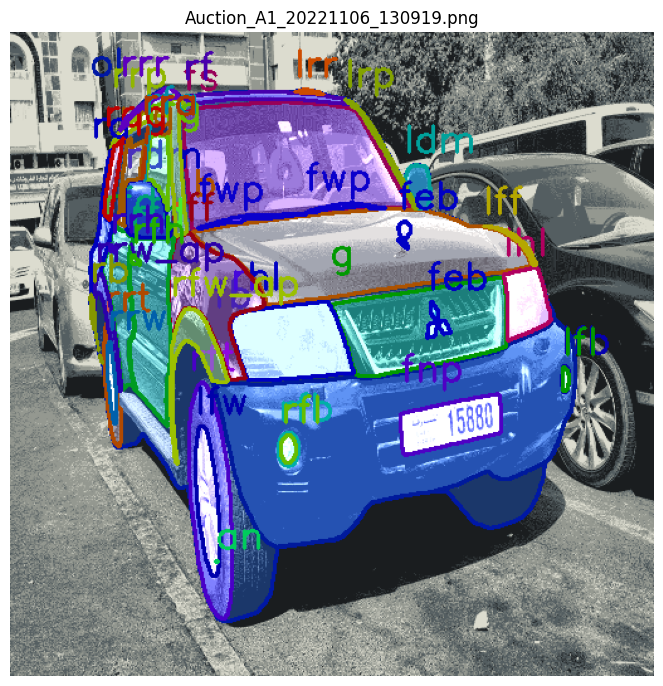

In [27]:
visualizer.show_image()

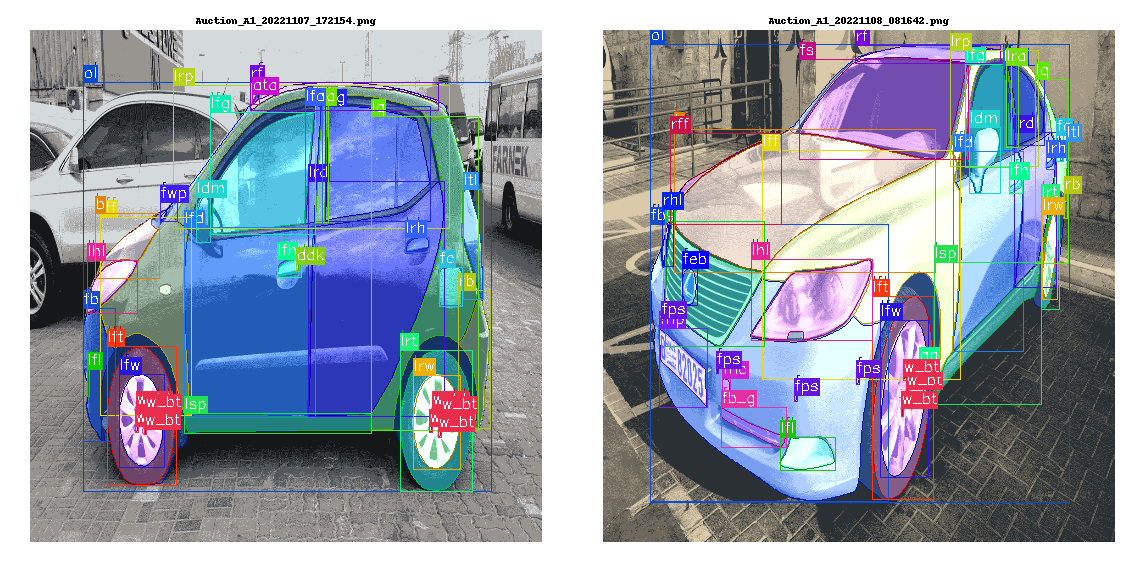

In [28]:
visualizer.show_batch(samples=2 , font_scale=0.5 , thickness=1 ,  bbox_flag=True)

In [29]:
visualizer.show_video(samples = 2 , font_scale=0.5 , thickness=1 ,  bbox_flag=True)

In [30]:
splited_dataset = seg_dataset.train_test_split(test_size=0.5)

In [31]:
# splited_dataset.save("b" , export_to="base")
# splited_dataset.save("b" , export_to="yolo")
# splited_dataset.save("b" , export_to="coco")
# splited_dataset.save("b" , export_to="detectron2")
# splited_dataset.save("b" , export_to="mask")


In [32]:
# seg_dataset.export(to="base" , output_dir="x_seg/base" ,copy_images=True)
# seg_dataset.export(to="yolo" , output_dir="x_seg/yolo" ,copy_images=True)
# seg_dataset.export(to="coco" , output_dir="x_seg/coco" ,copy_images=True)
# seg_dataset.export(to="detectron2" , output_dir="x_seg/detectron2" ,copy_images=True)
# seg_dataset.export(to="mask" , output_dir="x_seg/mask" ,copy_images=True)

### Passing csv files as root


```python
import pandas as pd
# Load segmentation coco dataset
yolo_df = pd.read_csv(root ="../dataset/csv/coco_train_seg.csv")


#### COCO Segmentation

In [33]:
import pandas as pd
df = pd.read_csv("../dataset/csv/coco_train_seg.csv")
df.head()

,img_path,anno_path
0,../dataset/seg_coco/images/Auction_A1_20221106...,../dataset/seg_coco/annotations/annotations.json
1,../dataset/seg_coco/images/Auction_A1_20221106...,../dataset/seg_coco/annotations/annotations.json
2,../dataset/seg_coco/images/Auction_A1_20221107...,../dataset/seg_coco/annotations/annotations.json
3,../dataset/seg_coco/images/Auction_A1_20221108...,../dataset/seg_coco/annotations/annotations.json


In [34]:
from core_assist.dataset import SegDataset
seg_dataset  = SegDataset(root="../dataset/csv/coco_train_seg.csv" , format="coco")

Processing CSV splits: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]


In [35]:
seg_dataset.label_df.head()

,image_id,image_width,image_height,segmentation,category,class_id,image_path,split,x_min,y_min,width,height,area
0,Auction_A1_20221106_130919.png,1444,1024,"{'size': [1024, 1444], 'counts': '_^[?3io0<H2L...",rhl,1,../dataset/seg_coco/images/Auction_A1_20221106...,,491.0,427.0,280.0,127.0,27814
1,Auction_A1_20221106_130919.png,1444,1024,"{'size': [1024, 1444], 'counts': 'mWn7W1an0`0G...",rdm,2,../dataset/seg_coco/images/Auction_A1_20221106...,,254.0,233.0,109.0,94.0,8168
2,Auction_A1_20221106_130919.png,1444,1024,"{'size': [1024, 1444], 'counts': 'YTR<4jo0a0_O...",fs,3,../dataset/seg_coco/images/Auction_A1_20221106...,,386.0,110.0,514.0,206.0,79962
3,Auction_A1_20221106_130919.png,1444,1024,"{'size': [1024, 1444], 'counts': 'mYf<1no02O1O...",b,4,../dataset/seg_coco/images/Auction_A1_20221106...,,406.0,280.0,762.0,154.0,74616
4,Auction_A1_20221106_130919.png,1444,1024,"{'size': [1024, 1444], 'counts': 'PcYk0=bo0?B;...",fnp,5,../dataset/seg_coco/images/Auction_A1_20221106...,,873.0,574.0,229.0,100.0,15350


#### YOLO segmentation 

In [36]:
import pandas as pd
df = pd.read_csv("../dataset/csv/yolo_train_seg.csv")
df.head()

,img_path,anno_path,split
0,../dataset/seg_coco/images/Auction_A1_20221106...,../dataset/seg_yolo/annotations/train/Auction_...,train
1,../dataset/seg_coco/images/Auction_A1_20221106...,../dataset/seg_yolo/annotations/train/Auction_...,train
2,../dataset/seg_coco/images/Auction_A1_20221107...,../dataset/seg_yolo/annotations/train/Auction_...,train
3,../dataset/seg_coco/images/Auction_A1_20221108...,../dataset/seg_yolo/annotations/train/Auction_...,train


In [37]:
from core_assist.dataset import SegDataset
seg_dataset  = SegDataset("../dataset/csv/yolo_train_seg.csv" , format="yolo" , mapping={1: 'rhl', 2: 'rdm', 3: 'fs', 4: 'b', 5: 'fnp', 6: 'fb', 7: 'ldm', 8: 'ol', 9: 'lhl', 10: 'lfw', 11: 'rfd', 12: 'rfl', 13: 'rfb', 14: 'lfl', 15: 'lfb', 16: 'rrg', 17: 'rfg', 18: 'rqg', 19: 'rrh', 20: 'rfh', 21: 'rq', 22: 'rb', 23: 'rrw', 24: 'rrt', 25: 'rft', 26: 'lff', 27: 'rrp', 28: 'lrp', 29: 'g', 30: 'feb', 31: 'fwp', 32: 'rfa', 33: 'rra', 34: 'rrr', 35: 'an', 36: 'lrr', 37: 'rf', 38: 'rff', 39: 'rfw_ap', 40: 'rrw_ap', 41: 'rrd', 42: 'rfw', 43: 'fb_g', 44: 'rtl', 45: 'rsp', 46: 'w_bt', 47: 'rf_qg', 48: 'lrd', 49: 'lfd', 50: 'lrw', 51: 'lq', 52: 'lft', 53: 'fc', 54: 'lrt', 55: 'ltl', 56: 'lsp', 57: 'lfh', 58: 'lrh', 59: 'lfg', 60: 'lrg', 61: 'ddk', 62: 'lfa', 63: 'lra', 64: 'ata', 65: 'fps', 66: 'fhc', 67: 'rhw', 68: 'lhw', 69: 'rps'})

Loading yolo annotations from CSV:


Processing CSV: 100%|██████████| 4/4 [00:00<00:00,  9.43it/s]


In [38]:
seg_dataset.label_df.head()

,split,image_id,image_width,image_height,segmentation,category,image_path,class_id,x_min,y_min,width,height,area
0,train,Auction_A1_20221107_172154.png,1444,1024,"{'size': [1024, 1444], 'counts': 'bg`h0b0Zn0T1...",lrd,../dataset/seg_coco/images/Auction_A1_20221107...,48.0,784.0,301.0,383.0,471.0,118943.0
1,train,Auction_A1_20221107_172154.png,1444,1024,"{'size': [1024, 1444], 'counts': 'n^a=W2^m0j0V...",lfd,../dataset/seg_coco/images/Auction_A1_20221107...,49.0,433.0,394.0,368.0,379.0,126790.0
2,train,Auction_A1_20221107_172154.png,1444,1024,"{'size': [1024, 1444], 'counts': ']aR62lo04M4L...",lff,../dataset/seg_coco/images/Auction_A1_20221107...,26.0,194.0,374.0,259.0,396.0,45079.0
3,train,Auction_A1_20221107_172154.png,1444,1024,"{'size': [1024, 1444], 'counts': 'cgi7a0]o0b0]...",lfw,../dataset/seg_coco/images/Auction_A1_20221107...,10.0,249.0,688.0,127.0,185.0,18494.0
4,train,Auction_A1_20221107_172154.png,1444,1024,"{'size': [1024, 1444], 'counts': 'ecd4^1Um0`1I...",ol,../dataset/seg_coco/images/Auction_A1_20221107...,8.0,148.0,103.0,1150.0,819.0,688720.0
